# Prédiction des profils 

1. [Importation des packages](#Importation-des-packages)
2. [Traitement et analyse des données](#Traitement-et-analyse-des-données)
3. [Clustering](#Clustering)
4. [Prédiction des métiers manquants](#Prédiction-des-métiers-manquants)
5. [Bonus ++](#Bonus-+-+)
6. [Annexe](#Annexe)

## Importation des packages 

In [1]:
#!pip3 install matplotlib
#!pip3 install pandas
#!pip3 install numpy
#!pip3 install seaborn
#!pip3 install -U scikit-learn


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer

import random
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix


## Traitement et analyse des données 

In [2]:
#Importation de la base de données
data = pd.read_csv('data.csv', sep=',', decimal=',')
#Afficher les cinq premières lignes de la base 
data.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [3]:
# Explorer le type des données pour s'assurer que l'expérience est bien lue 
data.dtypes


Entreprise       object
Metier           object
Technologies     object
Diplome          object
Experience      float64
Ville            object
dtype: object

1) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs
manquantes ?

In [4]:
# Nombre d'observations
print('La base contient', len(data), 'observations'+'\n')
# Nombre de valeurs manquantes par variable
print(data.isna().sum(), '\n')
print ('Les variables "Entreprise", "Metier" et "Experience" contiennent des valeurs manquantes.'+'\n')


La base contient 9582 observations

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64 

Les variables "Entreprise", "Metier" et "Experience" contiennent des valeurs manquantes.



2.a. Réaliser l'imputation des valeurs manquantes pour la variable "Experience"
avec la valeur médiane pour les data scientists.

In [5]:
# Créer une copie de la base initiale surlaquelle on va faire les modifications
c_data=data

# Calculer la mediane d'expérience des data scientists 
median_sc=c_data[c_data['Metier']
                 =="Data scientist"]['Experience'].dropna().median()

# Remplacer toute valeur avec condition nulle et data scientist par cette médiane
c_data.loc[c_data['Metier']
           =="Data scientist",'Experience']=c_data.loc[c_data['Metier']
                                                       =="Data scientist",'Experience'].fillna(median_sc)

# S'assurer que le nombre des valeurs manquantes chez les data scientists est null en terme d'expérience
print('Le nombre de valeurs manquantes pour l expérience des data scientists est : ',
      c_data.loc[c_data['Metier'] =="Data scientist",'Experience'].isna().sum())

Le nombre de valeurs manquantes pour l expérience des data scientists est :  0


b.2. Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec la valeur moyenne pour les data engineers

In [6]:
# Le nombre d'expérience moyen pour les data engineers 
mean_en=c_data[c_data['Metier']=="Data engineer"]['Experience'].dropna().mean()

#Remplacer toute valeur avec condition nulle et data scientist par cette moyenne
c_data.loc[c_data['Metier']
           =="Data engineer",'Experience']=c_data.loc[c_data['Metier']
                                                      =="Data engineer",'Experience'].fillna(mean_en)

# S'assurer que le nombre des valeurs manquantes chez les data engineers est null en terme d'expérience
print('Le nombre de valeurs manquantes pour l expérience des data engineers est : '
      ,c_data.loc[c_data['Metier']=="Data engineer",'Experience'].isna().sum())


Le nombre de valeurs manquantes pour l expérience des data engineers est :  0


3) Combien d'années d'expériences ont, en moyenne, chacun des profils : le
data scientist, le lead data scientist et le data engineer en moyenne ?

In [7]:
#Imputation des valeurs manquantes en nombre d'expérience pour chaque profil  par la moyenne 

#Calcler la moyenne de chaque profile 
mean_sc=c_data[c_data['Metier']=="Data scientist"]['Experience'].dropna().mean()
mean_L_sc=c_data[c_data['Metier']=="Lead data scientist"]['Experience'].dropna().mean()
mean_ar=c_data[c_data['Metier']=="Data architecte"]['Experience'].dropna().mean()

#Remplacer toute valeur avec condition nulle  par la moyenne calculée du le profil concerné
c_data.loc[c_data['Metier']=="Data scientist"
           ,'Experience']=c_data.loc[c_data['Metier']=="Data scientist",'Experience'].fillna(mean_sc)
c_data.loc[c_data['Metier']=="Lead data scientist"
           ,'Experience']=c_data.loc[c_data['Metier']
                                     =="Lead data scientist",'Experience'].fillna(mean_L_sc)
c_data.loc[c_data['Metier']=="Data architecte"
           ,'Experience']=c_data.loc[c_data['Metier']=="Data architecte",'Experience'].fillna(mean_ar)

#S'assurer qu'il n ya plus de valeurs manquantes
c_data['Experience'].isna().sum() 

0

In [8]:
# Nombres d'années d'expérience moyen des data scientists :
print('En moyenne, les data scientists ont ',round(mean_sc,2),'années d expérience.')
# Nombres d'années d'expérience moyen des Lead data scientists :
print('En moyenne, les Lead data scientists ont ',round(mean_L_sc,2),'années d expérience.')
# Nombres d'années d'expérience moyen des data engineer :
print('En moyenne, les data engineers ont', round(mean_en,2),'années d expérience.')
# Nombres d'années d'expérience moyen des data architectes  :
print('En moyenne, les Data architecte ont', round(mean_ar,2),'années d expérience.')

En moyenne, les data scientists ont  2.24 années d expérience.
En moyenne, les Lead data scientists ont  3.97 années d expérience.
En moyenne, les data engineers ont 2.98 années d expérience.
En moyenne, les Data architecte ont 3.0 années d expérience.


4) Faire la représentation graphique de votre choix afin de comparer le
nombre moyen d'années d'expériences pour chaque métier

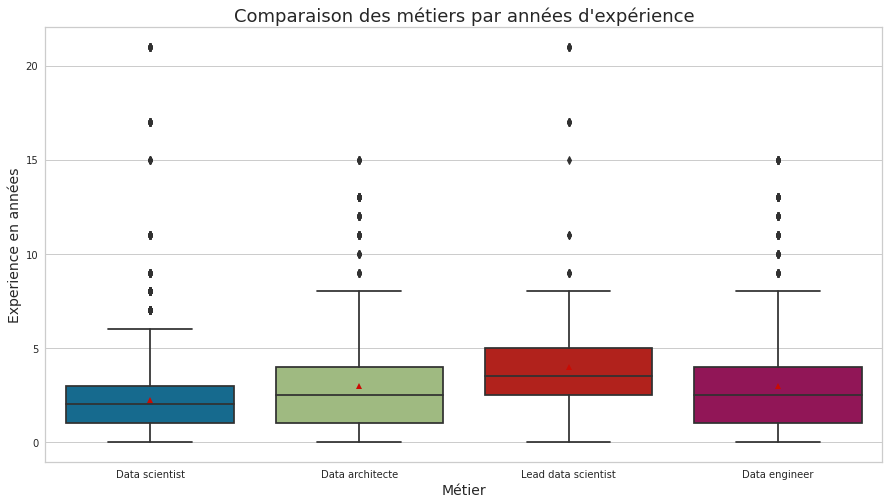

In [11]:
# 1 ère pensée  : visualisation du nombre moyen d'expérience sur les boxplots car on peut voir les moyennes 
#et s'il existe une différence significative entre elles
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="Metier", y="Experience", data=c_data,showmeans=True)
plt.ylabel("Experience en années", size=14)
plt.xlabel("Métier", size=14)
plt.title("Comparaison des métiers par années d'expérience", size=18)
plt.show()

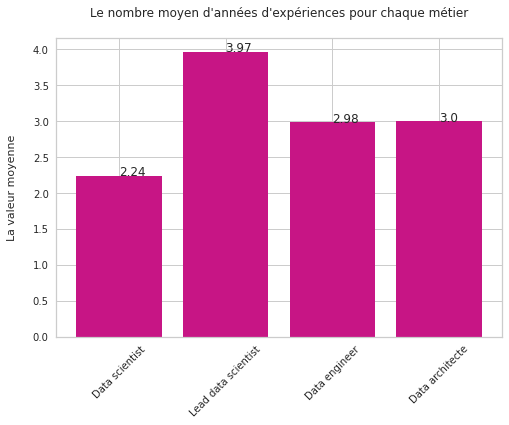

In [12]:
# Pour une visualisation plus claire des moyennes nous allons utiliser les bar plot
X=('Data scientist', 'Lead data scientist', 'Data engineer', 'Data architecte') #Axe des abscisses 
Y=[mean_sc,mean_L_sc,mean_en,mean_ar] #Les valeurs pour chaque métier 
plt.bar(X,Y,color='mediumvioletred')
# Ajouter les valeurs des moyennes sur les bars 
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i],2),round(y[i],2))
addlabels(X,Y)
# Ajout du titre et noms des axes 
plt.xticks(X,rotation=45)
plt.ylabel("La valeur moyenne\n")
plt.title("Le nombre moyen d'années d'expériences pour chaque métier\n")
# Ajouter les valeurs des moyennes sur les bars du plot 

plt.show()

* Les Lead data scientists ont la plus grande moyenne en terme d'années d'expérience. Ce résultat était attendu vu que le poste de "Lead" exige déjà un profil expérimenté par rapport au reste des profils de la base. Donc leur recrtuement est essentiellement basé sur leur grand nombre d'années d'expérience.
* Les data scientists ont le nombre d'années d'expérience le plus faible. C'est le poste le moins exigeant en terme d'années d'expérience lors du recrutement.
* Les data enginners et data architectes ont une moyenne d'expérience comparables et ont plus d'expertise que les  data scientists. L'exigence en nombre d'expérience pour le poste de data engineer / architecte est souvent plus sévère lors du recrutement par rapport à un data scientist. Ce ci peut reflèter la complexité du métier du data engineer/data architecte par rapport au data scientist (plus d'outils et de connaissances à acquérir).Ce ci peut aussi refléter la différences des salaires entre data enginners/ architectes qui gagnent souvent plus que les data scientists.



5) Transformer la variable continue 'Experience' en une nouvelle variable
catégorielle 'Exp_label' à 4 modalités : débutant, confirmé, avancé et expert.
Veuillez expliquer votre choix de la règle de transformation

In [13]:
# Observer le comportement de la variable pour décider de la méthode de transformation
print(c_data['Experience'].describe(),'\n','\n')


count    9582.000000
mean        2.814553
std         2.703857
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        21.000000
Name: Experience, dtype: float64 
 



Le choix des intervalles est basée sur des recherches Google sur la norme des années d'expériences à assigner à chaque label.  

* Débutant : de 0 à 2 ans d’expérience.
* Confirmé : de 3 à 4 ans d’expérience.
* Avancé   : entre 5 et 10 ans d’expérience.
* Expert  : au-dessus de 10 anns d’expérience.

Sources :
*  https://fleid.net/2012/10/09/consultants-juniors-confirmes-seniors-quels-criteres-pour-quantifier-lexperience/
*  https://www.cadremploi.fr/editorial/conseils/salaire/detail/article/cadres-seniors-comment-baisser-ses-pretentions-salariales-sans-perdre-la-face.html


In [14]:
# Découpage de la variable expérience en 4 labels 
c_data['Exp_label']=pd.cut(c_data.Experience,bins=[-1,2,4,10,99],
                           labels=['Debutant','Confirmé','Avancé','Expert'])
# Afficher les 5 premières lignes 
c_data.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Debutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,Confirmé
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,Confirmé
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,Debutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,Debutant


6) Quelles sont les 5 technologies les plus utilisées ? Faites un graphique


In [15]:
# Les 5 technologies les plus utilisées
print('Les 5 technologies les plus utilisées sont :','\n')
print(c_data.Technologies.apply(lambda x : x.split("/")).explode().value_counts().head(5))
print('\n')
print('Les 5 combinaisons de technologies les plus utilisées sont :','\n')

print(c_data['Technologies'].value_counts().head(5))

Les 5 technologies les plus utilisées sont : 

Python    6627
R         4374
SQL       2581
Java      1719
Hadoop    1589
Name: Technologies, dtype: int64


Les 5 combinaisons de technologies les plus utilisées sont : 

SQL/R/Python//Big data                                539
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    458
C++/R/Python/Matlab/Matplotlib                        273
Hadoop/Hive/Vertica/Tableau                           250
SPSS/Excel/SAS/R/machine learning/AI/Scoring          250
Name: Technologies, dtype: int64


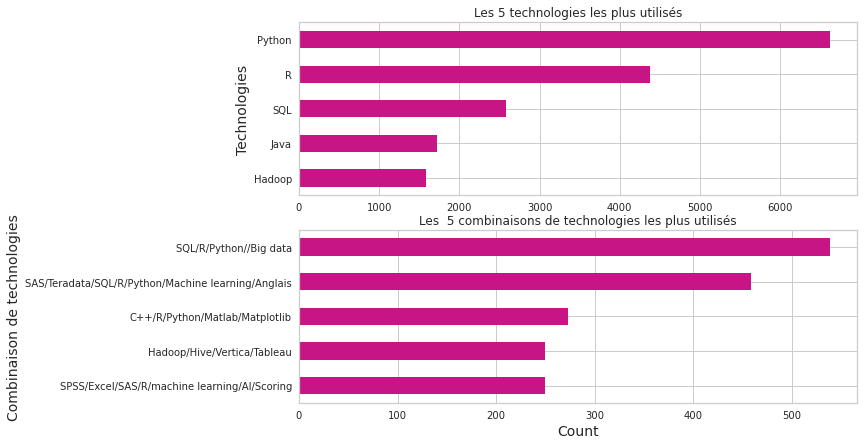

In [16]:
# Plot des 5 technologies les plus utilisées
plt.subplot(211)
c_data.Technologies.apply(lambda x 
                          : x.split("/")).explode().value_counts(ascending=True).tail(5).plot(kind='barh'
                                                                , figsize=(10,7),color='mediumvioletred')
plt.title('Les 5 technologies les plus utilisés')
plt.ylabel("Technologies", size=14)

# Plot des 5 combinaison de technologies les plus utilisées
plt.subplot(212)
# Plot des 5 technologies les plus utilisées
c_data['Technologies'].value_counts(ascending=True).tail(5).plot(kind='barh',
                                                                 figsize=(10,7),color='mediumvioletred')
plt.title('Les  5 combinaisons de technologies les plus utilisés')
plt.ylabel("Combinaison de technologies", size=14)
plt.xlabel("Count", size=14)
plt.show()

## Clustering

7) Réaliser une méthode de clustering non supervisée de votre choix pour faire
apparaître le nombre de clusters que vous jugerez pertinents. Donnez les
caractéristiques de chacun des clusters.

* La consigne était de faire  Un clustering non supervisé afin d'identifier 2 groupes de profils
techniques distincts donc puisque le nombre de groupe est connu, le plus simple serait de tenter d'utiliser les k-means avec k=2.

* Les k-means sont basés sur la distance entre les observations. Toutes les variables catégorielles doivent donc être codées en valeurs numériques standardisés afin que les calculs puissent être effectués et aucune variable ne soit plus importante que l'autre.

* L'expérience étant la seule variable numérique,elle ne sera pas codée mais sera standardisée. Une nouvelle base de données sera créée pour contenir toutes les variables catégorielles codées. 

* La méthode d'encodage recommandée est le One Hot encoding , il s'agit de créer une nouvelle colonne pour chaque modalité. On assigne les valeurs 1 si la modalité existe pour l'observation concernée et 0 sinon.


In [17]:
# Supprimer les valeurs manquantes de la base de données à fin d'éviter d'avoir des colonnes supplémentaires 
#lors du one hot encoding
df_no_na = c_data[["Experience","Metier", "Diplome","Technologies"]].dropna()
print('le nombre d observations de la base devient :', len(df_no_na))

le nombre d observations de la base devient : 9563


Afin de bien mener le clustering , nous allons suivre les étapes suivantes : 
* 1- Exploser la variable technologies pour avoir des outils séparés qui nous aiderons à identifier les clusters par la suite 
* 2- Encoder les bases d'outils et la base des autres variables traitées
* 3- Faire l'union des deux bases 
* 4- Standardiser la base obtenue pour s'assurer qu'aucune variable n'a un poids plus que l'autre et que toutes les variables n'ont pas différentes unités.

In [18]:
# 1- Exploser la variable technologies pour avoir des outils séparés qui nous aiderons à identifier les clusters 
outils= df_no_na.Technologies.apply(lambda x : x.split("/")).explode()
outils=pd.DataFrame(outils)
outils=outils.rename(columns={"Technologies": "Outils"})
outils.head(6)

,Outils
0,Matlab
0,Python
0,Pyspark
0,Scikit-learn
0,Tensorflow
1,Python


In [19]:
#2-a Encoder la d'outils 

# Appliquer le One hot encoding 
outils_hot_enc = pd.get_dummies(outils["Outils"], columns= ["Outils"])
# Un des colonnes est une chaine vide
outils_hot_enc=outils_hot_enc.drop([''], axis=1)
# Inclure l'index dans la base pour faire l'aggrégation plus tard
outils_hot_enc=outils_hot_enc.reset_index()
# Sommer les valeurs ayant le meme index pour obtenir des lignes uniques 
outils_hot_enc=outils_hot_enc.groupby('index').sum().reset_index()
outils_hot_enc
# drop index 
#outils_hot_enc=outils_hot_enc.drop(['index'], axis=1)
outils_hot_enc=outils_hot_enc[['index','Python','R','SQL','Java','Hadoop']] # Choisir que les 5 premiers 
#outils les plus utilisés sinn on aura plus que 60 colonnes et le modèle risque de ne pas bien classifier

outils_hot_enc

,index,Python,R,SQL,Java,Hadoop
0,0,1,0,0,0,0
1,1,1,0,0,1,0
2,2,1,1,1,0,0
3,3,1,0,0,1,0
4,4,1,0,0,0,0
...,...,...,...,...,...,...
9558,9577,1,1,0,0,0
9559,9578,1,1,0,0,0
9560,9579,0,1,0,0,0
9561,9580,1,0,0,0,0


In [20]:
# S'assurer que le maximum de chaque variable est 1
outils_hot_enc.describe().loc[['min','max']]

,index,Python,R,SQL,Java,Hadoop
min,0.0,0.0,0.0,0.0,0.0,0.0
max,9581.0,1.0,1.0,1.0,1.0,1.0


In [21]:
df_no_na

,Experience,Metier,Diplome,Technologies
0,1.0,Data scientist,Master,Matlab/Python/Pyspark/Scikit-learn/Tensorflow
1,3.0,Data architecte,Master,Python/Java/Scala/MongoDB
2,3.0,Lead data scientist,Master,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...
3,1.5,Data scientist,Master,C/C++/Java/Python
4,2.0,Data scientist,Phd,Matlab/Python/C++/numpy/Tensorflow/scikit-learn
...,...,...,...,...
9577,1.5,Data scientist,Master,C++/R/Python/Matlab/Matplotlib
9578,11.0,Data scientist,Master,Excel/Python/Matlab/R/machine learning/anglais
9579,1.0,Data scientist,Master,R/machine learning/Excel/VBA
9580,17.0,Data scientist,Master,Python/Pyspark/machine learning/Microsoft Azure


In [22]:
#2-b Encoder la base des autres variables 
# Ajouter à la variable experience les variables encodés de métier et diplome, les variables entreprises
#et ville ne me semblent pas significatifs
c_data_coded = pd.get_dummies(df_no_na[["Experience","Metier", "Diplome"]], columns= ["Metier", "Diplome"])
c_data_coded=c_data_coded.reset_index()
c_data_coded.head()

,index,Experience,Metier_Data architecte,Metier_Data engineer,Metier_Data scientist,Metier_Lead data scientist,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd
0,0,1.0,0,0,1,0,0,1,0,0
1,1,3.0,1,0,0,0,0,1,0,0
2,2,3.0,0,0,0,1,0,1,0,0
3,3,1.5,0,0,1,0,0,1,0,0
4,4,2.0,0,0,1,0,0,0,0,1


In [23]:
# Union des deux bases 
coded_data_all = pd.merge(c_data_coded, outils_hot_enc, on='index', how='inner')
# Effacer la variable index
coded_data_all=coded_data_all.drop(columns="index",axis=1)
coded_data_all.head()


,Experience,Metier_Data architecte,Metier_Data engineer,Metier_Data scientist,Metier_Lead data scientist,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd,Python,R,SQL,Java,Hadoop
0,1.0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,3.0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,3.0,0,0,0,1,0,1,0,0,1,1,1,0,0
3,1.5,0,0,1,0,0,1,0,0,1,0,0,1,0
4,2.0,0,0,1,0,0,0,0,1,1,0,0,0,0


In [24]:
# Standardiser la base de données obtenue
scaler = MinMaxScaler() # Permet de standardiser la base de données pour obtenir des nouvelles valeurs avec
#une moyenne nulle et un écart-type de 1. Cette étape est importante pour s'assurer qu'une variable 
#n'est pas interprétée comme étant plus importante que l'autre.
scaled_features = scaler.fit_transform(coded_data_all) #appliquer la  standardisation
scaled_features # Résultats 

array([[0.04761905, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.14285714, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.04761905, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.80952381, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

a. Justifier le nombre de clusters 


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


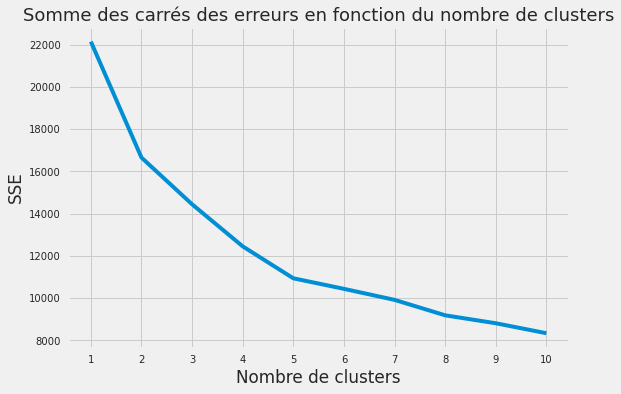



L effet de coude est observable pour k=5, ce qui signifie que 5 est le nombre optimal de clusters


In [25]:
# A list holds the SSE values for each k
km = {
     "init": "random",
     "n_init": 10,
     "max_iter": 100,
     "random_state": 42,

}
# A list holds the SSE values for each k

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **km)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Nombre de clusters")
plt.ylabel("SSE")
plt.title("Somme des carrés des erreurs en fonction du nombre de clusters", size=18)
plt.show()
print ('\n')
print ('L effet de coude est observable pour k=5, ce qui signifie que 5 est le nombre optimal de clusters')

b. Justifier la performance de votre algorithme grâce à une métrique.

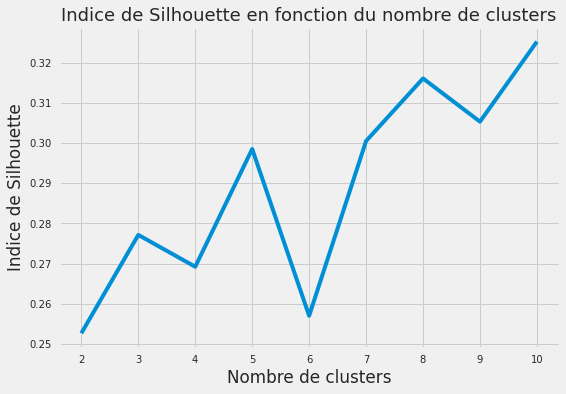

In [26]:
# S'investiguer plus pour assurer un bon choix du nombre de clusters étant donné que 5 clusters parait 
#beaucoup,si la différence de l'indice de silhouette n'est pas grand, on peut considerer 3 clusters uniquement  

km = {
     "init": "random",
     "n_init": 10,
     "max_iter": 100,
     "random_state": 42,

}

# Intialiser la liste qui contiendra les indices de silhouette pour chaque k
silhouette_coefficients = []

#L'indice de silhouette varie entre -1 et 1. Plus c'est proche de 1  plus ca indique que les échantillons
#sont plus proches des observations dans le meme cluster que les observations des clusters voisins.
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **km)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Nombre de clusters")
plt.ylabel("Indice de Silhouette")
plt.title("Indice de Silhouette en fonction du nombre de clusters", size=18)

plt.show()

In [27]:
#Calcul de l'indice de silhouaite correspondant à k=5
kmeans = KMeans(
     init="random", # init controls the initialization technique. 
    #The standard version of the k-means algorithm is implemented by setting init to "random"
     n_clusters=5, # n_clusters sets k for the clustering step. 
     n_init=10, # n_init sets the number of initializations to perform.
     max_iter=100, # max_iter sets the number of maximum iterations for each initialization 
     random_state=42 # Fixer la graine
)

kmeans.fit(scaled_features)


score = silhouette_score(scaled_features, kmeans.labels_, metric='euclidean')
print('L indice de silhouette est égale à ', round(score ,2) ,'\n')  
print('Cet cet indice reflète la distance entre les points au sein d un meme cluster et entre les clusters',
      'plus c est proche de 1, mieux c est. ') 

L indice de silhouette est égale à  0.3 

Cet cet indice reflète la distance entre les points au sein d un meme cluster et entre les clusters plus c est proche de 1, mieux c est. 


In [28]:
#SSE value
kmeans.inertia_

10939.803252866186

 c. Donnez les caractéristiques de chacun des clusters et interprétez.

In [29]:
# concaténer les clusters avec la base de données ( sans valeurs manquantes) 
df_no_na_con = c_data[["Experience","Metier",
                       "Diplome","Technologies","Exp_label"]].dropna().reset_index(drop=True)
labels_ = kmeans.labels_
labels= pd.DataFrame(labels_)
labeleddata = pd.concat((df_no_na_con,labels),axis=1)
labeleddata = labeleddata.rename({0:'labels'},axis=1)
labeleddata.head()

,Experience,Metier,Diplome,Technologies,Exp_label,labels
0,1.0,Data scientist,Master,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Debutant,3
1,3.0,Data architecte,Master,Python/Java/Scala/MongoDB,Confirmé,2
2,3.0,Lead data scientist,Master,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Confirmé,4
3,1.5,Data scientist,Master,C/C++/Java/Python,Debutant,3
4,2.0,Data scientist,Phd,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Debutant,1


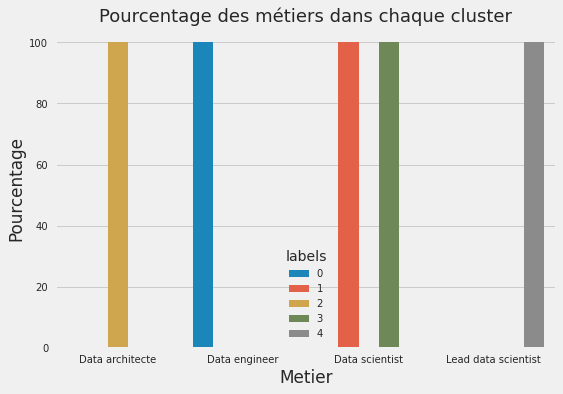

In [30]:
#Barplot des métiers par cluster
metier_counts = (labeleddata.groupby(['labels'])['Metier']
                     .value_counts(normalize=True)
                     .rename('Pourcentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Metier'))
sns.barplot(x="Metier", y="Pourcentage", hue="labels", data=metier_counts)
plt.title("Pourcentage des métiers dans chaque cluster", size=18)
plt.show()

Le clustering selon 5 classes a donné des clusters trop détaillés de telle sorte que chaque est métier est un cluster. Nous passons donc à deux classes.

b. Métrique de performance 

In [31]:
#Calcul de l'indice de silhouaite correspondant à k=2
kmeans = KMeans(
     init="random", # init controls the initialization technique. 
     n_clusters=2, # n_clusters sets k for the clustering step. 
     n_init=10, # n_init sets the number of initializations to perform. 
     max_iter=100, # max_iter sets the number of maximum iterations for each initialization 
     random_state=42 # Fixer la graine
)

kmeans.fit(scaled_features)


score = silhouette_score(scaled_features, kmeans.labels_, metric='euclidean')
print('L indice de silhouette pour k=2 est égale à ', round(score ,2) ,'\n')  
print('Cet cet indice reflète la distance entre les points au sein d un meme cluster et entre les clusters',
      'plus c est proche de 1, mieux c est. ') 

L indice de silhouette pour k=2 est égale à  0.25 

Cet cet indice reflète la distance entre les points au sein d un meme cluster et entre les clusters plus c est proche de 1, mieux c est. 


 c. Donnez les caractéristiques de chacun des clusters et interprétez.

In [32]:
# concaténer les clusters avec la base de données ( sans valeurs manquantes) 
df_no_na_con = c_data[["Experience","Metier", "Diplome",
                       "Technologies","Exp_label"]].dropna().reset_index(drop=True)
labels_ = kmeans.labels_
labels= pd.DataFrame(labels_)
labeleddata = pd.concat((df_no_na_con,labels),axis=1)
labeleddata = labeleddata.rename({0:'labels'},axis=1)
labeleddata.head()



,Experience,Metier,Diplome,Technologies,Exp_label,labels
0,1.0,Data scientist,Master,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Debutant,0
1,3.0,Data architecte,Master,Python/Java/Scala/MongoDB,Confirmé,1
2,3.0,Lead data scientist,Master,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Confirmé,0
3,1.5,Data scientist,Master,C/C++/Java/Python,Debutant,0
4,2.0,Data scientist,Phd,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Debutant,0


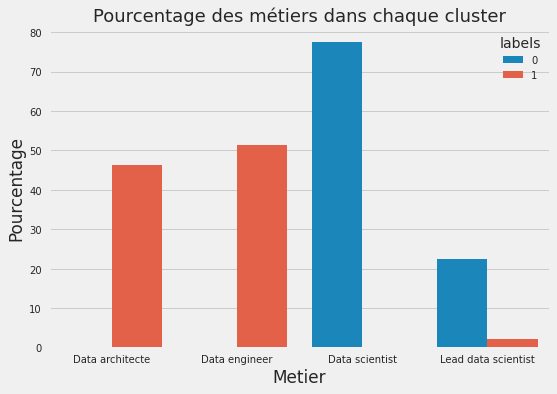

In [33]:
#Barplot des métiers par cluster
metier_counts = (labeleddata.groupby(['labels'])['Metier']
                     .value_counts(normalize=True)
                     .rename('Pourcentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Metier'))
sns.barplot(x="Metier", y="Pourcentage", hue="labels", data=metier_counts)
plt.title("Pourcentage des métiers dans chaque cluster", size=18)
plt.show()

In [34]:
metier_counts

,labels,Metier,Pourcentage
3,1,Data architecte,46.424667
2,1,Data engineer,51.322983
0,0,Data scientist,77.394790
5,1,Data scientist,0.065602
1,0,Lead data scientist,22.605210
4,1,Lead data scientist,2.186748


* Le cluster 0 est composé de Data scientists (~ 77.4%) et Lead data scientists (~22.6 %)
* Le cluster 1 est composé principalement de Data architectes (~ 46.4 %) et Data engineers (51.3%)

In [35]:
# Création d'une nouvelle base pour le plot des outils par cluster 
# Ajout des labels à la base ou les outils sont encodés
get_tools=coded_data_all
get_tools['labels']=labeleddata['labels']
values_counts=get_tools[["Python","R",	"SQL",	"Java",	"Hadoop","labels"]]
# transformer la base de sorte que les colonnes deviennent en ligne avec un ordre basé sur les labes
melting=values_counts.melt(id_vars=["labels"])
#Conserver que les observations ou les outils ont été utilisé
only_used_tools=melting.loc[melting['value']==1]
only_used_tools.head()

,labels,variable,value
0,0,Python,1
1,1,Python,1
2,0,Python,1
3,0,Python,1
4,0,Python,1


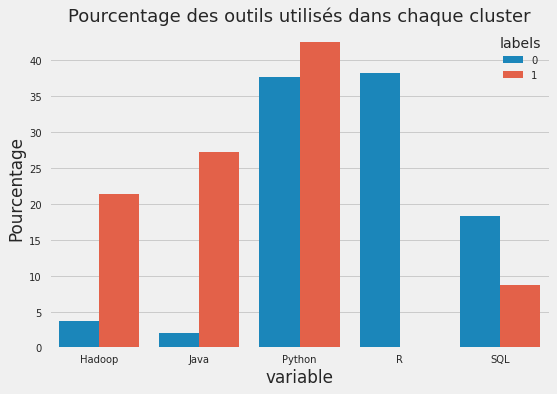

In [36]:
tool_counts = (only_used_tools.groupby(['labels'])['variable']
                     .value_counts(normalize=True)
                     .rename('Pourcentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('variable'))
sns.barplot(x="variable", y="Pourcentage", hue="labels", data=tool_counts)
plt.title("Pourcentage des outils utilisés dans chaque cluster", size=18)
plt.show()

In [37]:
tool_counts.sort_values('labels')

,labels,variable,Pourcentage
3,0,Hadoop,3.702731
4,0,Java,2.065826
1,0,Python,37.666317
0,0,R,38.191527
2,0,SQL,18.373599
7,1,Hadoop,21.399632
6,1,Java,27.292818
5,1,Python,42.523020
8,1,SQL,8.784530


* Le cluster 0 (Data scientists et Lead Data scientists) contient majoritairement les outils Python, R et SQL.
* Le cluster 1 (Data architectes et Data engineers) est composé par les outils Python, Java, Hadoop

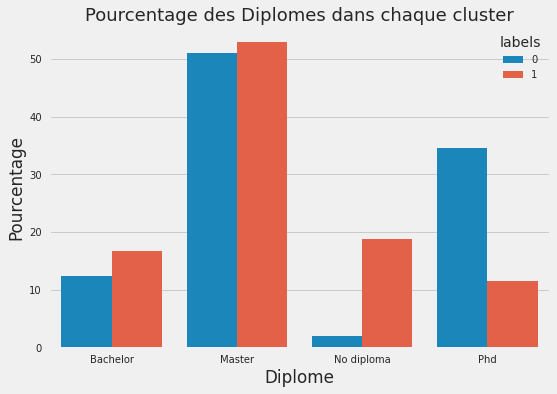

In [38]:
Diplome_percent = (labeleddata.groupby(['labels'])['Diplome']
                     .value_counts(normalize=True)
                     .rename('Pourcentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Diplome'))
sns.barplot(x="Diplome", y="Pourcentage", hue="labels", data=Diplome_percent)
plt.title("Pourcentage des Diplomes dans chaque cluster", size=18)
plt.show()

In [39]:
Diplome_percent.sort_values('labels')

,labels,Diplome,Pourcentage
2,0,Bachelor,12.464930
0,0,Master,50.981964
3,0,No diploma,2.004008
1,0,Phd,34.549098
6,1,Bachelor,16.816094
4,1,Master,52.853707
5,1,No diploma,18.740433
7,1,Phd,11.589766


* Le cluster 0 est caractérisé par les diplomés en Master et Phd.
* Le cluster 1 est majoritairement occupé par le niveau master, les autres niveaux d'études sont comparables.


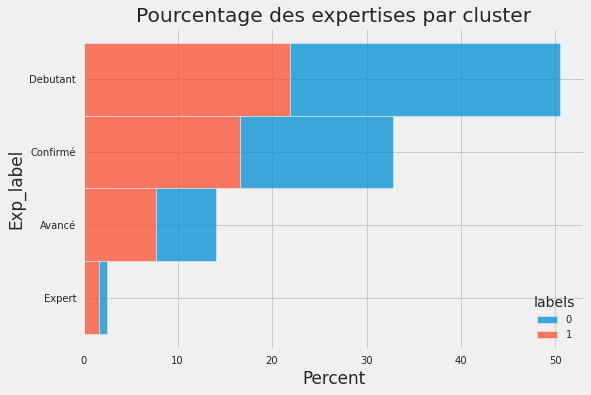

In [41]:
sns.histplot(binwidth=1,y="Exp_label", hue="labels", data=labeleddata, stat="percent", multiple="stack")
plt.title("Pourcentage des expertises par cluster")
plt.show()


* Le cluster 0 est majoritairement composé par les niveaux débutants et confirmés.
* Le cluster 1 est majoritairement composé par les niveaux débutants et confirmés.
* Les niveaux avancé et expert existent plus dans le cluster des data engineers.

### Conclusions : 
* Le cluster 0 correspond au profil des data scientists tant dis que le cluster 1 est celui des data engineers/arhitectes.
* Les outils utilisés par les data scientists sont R, Python et SQL alors que les data engineers utilisent plus Python ,Hadoop et Java.
* Les profils avancés et experts dans les métiers data (data scientists et engineers) sont rares.
* Les recruteurs en des data engineering sont plus exigeant par rapport à un poste de data scientists. On demande plus d'années d'expérience.

## Prédiction des métiers manquants

8) Réaliser la prédiction des métiers manquants dans la base de données par
l'algorithme de votre choix

In [42]:
# Supression de la variable métier de la base encodée
drop_metier=coded_data_all.drop(columns=["Metier_Data architecte",
                                         "Metier_Data engineer",	"Metier_Data scientist",
                                         "Metier_Lead data scientist","labels"],axis=1,inplace=False)
drop_metier.head()

,Experience,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd,Python,R,SQL,Java,Hadoop
0,1.0,0,1,0,0,1,0,0,0,0
1,3.0,0,1,0,0,1,0,0,1,0
2,3.0,0,1,0,0,1,1,1,0,0
3,1.5,0,1,0,0,1,0,0,1,0
4,2.0,0,0,0,1,1,0,0,0,0


In [43]:
# Déscritiser la varibale cible Métier 
label_encoder = preprocessing.LabelEncoder()
X = np.array(drop_metier)
Y = label_encoder.fit_transform(c_data.loc[c_data.loc[:,'Metier'].isna()==False,'Metier'])
Y

array([2, 0, 3, ..., 2, 2, 2])

In [44]:
#Splitting de la base en train et test 
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=.30,
                                                                    shuffle=True,
                                                                    random_state = random.seed(601))

In [45]:
# Modèles à essayer pour trouver le plus performant

# Fixer la graine
random.seed (601)
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier(random_state = random.seed(601))
RF = RandomForestClassifier(random_state = random.seed(601))

# Fitting des modèles
KNN_fit = KNN.fit(X_train, Y_train)
DT_fit = DT.fit(X_train, Y_train)
RF_fit = RF.fit(X_train, Y_train)

#Prédiction 
KNN_pred = KNN_fit.predict(X_test)
DT_pred = DT_fit.predict(X_test)
RF_pred = RF_fit.predict(X_test)

# Résultats de l'accuracy pour chaque modèle

print("KNN is %f percent accurate" % (accuracy_score(KNN_pred, Y_test)*100))
print("Decision Trees is %f percent accurate" % (accuracy_score(DT_pred, Y_test)*100))
print("Random Forests is %f percent accurate" % (accuracy_score(RF_pred, Y_test)*100))

KNN is 69.710701 percent accurate
Decision Trees is 71.767166 percent accurate
Random Forests is 71.383757 percent accurate


* 8.a. Justifier la performance de votre algorithme grâce à une métrique.

In [46]:
# L'accuracy = les prédictions correctes / le total des prédictions (=TP + TN /TP+TN + FP+ FN)
print ("le modèle le plus performant  est l'arbre de décision avec : ",
       round(accuracy_score(DT_pred, Y_test)*100,2)," % d'accuracy" )

le modèle le plus performant  est l'arbre de décision avec :  71.77  % d'accuracy


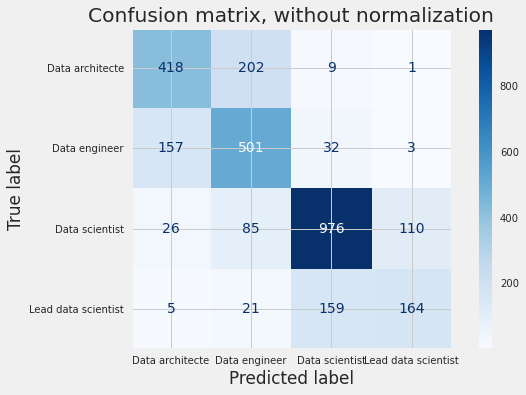

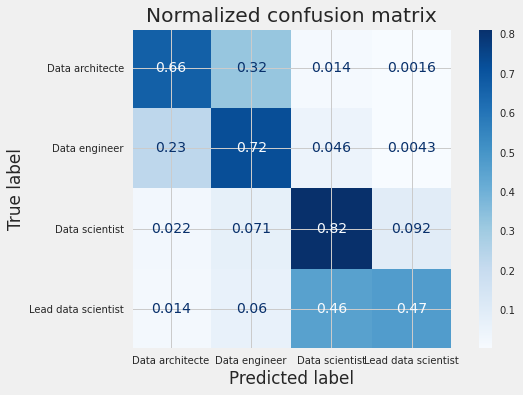

In [48]:
# Plot des matrices de confusion normalisées et non normalisées
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

class_names=['Data architecte','Data engineer','Data scientist','Lead data scientist']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        DT,
        X_test,
        Y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

plt.show()

* 8.b. Interpréter votre résultat.

* Le modèle est capable de prédire correctement les classes des data engineers et data architectes et data scientists(72% , 66% et 82% respectivement)
* Le modèle peut correctement détecter les Lead data scientists à 47% seulement , il confond souvent les Leads en des data scientists.


#### Prédiction des métiers manquants

In [46]:
# subset de la base ou les métiers sont manquants
data_na_met=c_data[c_data.loc[:,'Metier'].isna()==True]
#Garder que les variables dont on aura besoin pour la prédiction
data_na_met_no=data_na_met[["Experience","Diplome","Technologies"]]
# Exploser la variable Technilogies
outils_na_met_no= data_na_met_no.Technologies.apply(lambda x : x.split("/")).explode()
outils_na_met_no=pd.DataFrame(outils_na_met_no)
outils_na_met_no=outils_na_met_no.rename(columns={"Technologies": "Outils"})
outils_na_met_no

,Outils
346,Python
346,Spark
346,GNU
346,Linux
2058,VBA
...,...
9490,Python
9490,Spark
9490,Pycharm
9490,SAS


In [47]:
# One hot encoding des outils
# Appliquer le One hot encoding 
outils_hot_enc_na_met = pd.get_dummies(outils_na_met_no["Outils"], columns= ["Outils"])
# Faire un check sur le nom des colonnes 
outils_hot_enc_na_met.columns
# Inclure l'index dans la base pour faire l'aggrégation plus tard
outils_hot_enc_na_met=outils_hot_enc_na_met.reset_index()
# Sommer les valeurs ayant le meme index pour obtenir des lignes uniques 
outils_hot_enc_na_met=outils_hot_enc_na_met.groupby('index').sum().reset_index()

#outils_hot_enc=outils_hot_enc.drop(['index'], axis=1)
# Choisir que les 5 premiers outils les plus utilisés 
outils_hot_enc_na_met=outils_hot_enc_na_met[['index','Python','R','SQL','Java','Hadoop']] 

outils_hot_enc_na_met.head()

,index,Python,R,SQL,Java,Hadoop
0,346,1,0,0,0,0
1,2058,1,1,0,0,0
2,2670,1,1,0,1,0
3,2899,1,1,0,0,0
4,3346,0,0,0,0,0


In [48]:
# Ajouter à la variable experience les variables encodés de métier et diplome, les variables entreprises
#et ville ne me semblent pas significatifs
#c_data_coded = df_no_na['Experience']
c_data_coded_na_met = pd.get_dummies(data_na_met[["Experience", "Diplome"]], columns= [ "Diplome"])
c_data_coded_na_met=c_data_coded_na_met.reset_index()
c_data_coded_na_met.head()

,index,Experience,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd
0,346,2.5,0,0,1,0
1,2058,15.0,0,1,0,0
2,2670,1.5,0,1,0,0
3,2899,0.0,0,0,0,1
4,3346,7.0,0,1,0,0


In [49]:
# Union des bases se données
coded_data_all_na_met = pd.merge(c_data_coded_na_met, outils_hot_enc_na_met, on='index', how='inner')
coded_data_all_na_met=coded_data_all_na_met.drop(columns="index",axis=1)
coded_data_all_na_met.head()

,Experience,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd,Python,R,SQL,Java,Hadoop
0,2.5,0,0,1,0,1,0,0,0,0
1,15.0,0,1,0,0,1,1,0,0,0
2,1.5,0,1,0,0,1,1,0,1,0
3,0.0,0,0,0,1,1,1,0,0,0
4,7.0,0,1,0,0,0,0,0,0,0


In [50]:
# Standardiser la base de données 
scaler = MinMaxScaler() # Permet de standardiser la base de données pour obtenir des nouvelles 
#valeurs avec une moyenne nulle et un écart-type de 1. Cette étape est importante pour s'assurer 
#qu'une variable n'est pas interprétée comme étant plus importante que l'autre.
scaled_features = scaler.fit_transform(coded_data_all_na_met) #appliquer la  standardisation
#scaled_features # Résultats 

In [51]:
#Prédicition les métiers manquants par notre modéle
#The best model in term of accuracy is Decision trees model = DT_fit
predicted_met=model.predict(scaled_features)
predicted_met

array([1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2])

In [52]:
predicted_met

array([1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2])

In [53]:
#Remplissage des valeurs manquantes du métier par leurs valeurs prédites 
data_na_met["Metier"]=label_encoder.inverse_transform(predicted_met)
data_na_met['Metier'].isna().sum()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

In [54]:
#Affichage
print("Le résultat de la prediction des métiers manquants est obtenu à l'aide d'une classification",
      " des données avec le model de k- plus proches voisins:\n")
data_na_met

Le résultat de la prediction des métiers manquants est obtenu à l'aide d'une classification  des données avec le model de k- plus proches voisins:



,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
346,Jacobs,Data engineer,Python/Spark/GNU/Linux,No diploma,2.5,Paris,Confirmé
2058,Ball Aerospace,Data scientist,VBA/Python/Excel/R,Master,15.0,Lyon,Expert
2670,"eHire, LLC",Data scientist,Java/C/C++/R/Python,Master,1.5,Toulouse,Debutant
2899,Norfolk Southern Corp,Data scientist,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,0.0,Grenoble,Debutant
3346,J.E. Ranta Associates,Data engineer,Cassandra/MongoDB/NoSQL/AWS,Master,7.0,Rennes,Avancé
4248,KPMG,Data scientist,Python/Microsoft Azure/R/SQL,Phd,2.0,Lyon,Debutant
4290,"Pandora Media, Inc.",Data scientist,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Phd,1.5,Toulouse,Debutant
4292,Partners HealthCare(PHS),Data scientist,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,8.0,Bordeaux,Avancé
5425,Ashton Lane Group,Data engineer,Python/Pyspark/Spark,No diploma,5.0,Lyon,Avancé
5593,Lighthouse Lab Services,Data scientist,Python/R/machine learning/Excel/VBA/C++,Master,3.0,Lyon,Confirmé


## Bonus ++

Décrire de façon détaillée les différentes étapes pour mener à bien un projet data
complexe.
Dans le cadre d’une campagne de recrutement vous avez reçu un ensemble de cv
qui ne sont pas à jour (le poste actuel n’est pas présent). Un exemple de CV vous
ai donné en pièce jointe (il n'y a pas de mise en page type). Tous les CV sont au
format PDF.
On souhaite connaitre le poste actuel de chaque candidat.


* Quelles sont les différentes étapes nécessaires à la réalisation d'un tel projet?


* 1- Préciser les postes à prédire selon le besoin de l'entreprise 
* 2- Scrapping des PDFs 
* 3- Constituer une base de données 
* 4- Modélisation

* Pour chaque étape, détaillez les taches à accomplir, les méthodes à suivre,
les pistes possibles, les points critiques.

 Etape 1 :  Préciser les postes à prédire selon le besoin de l'entreprise :
* les variables extraites seront affecté aux postes demandées avec des probabilités.
Il est important de ne pas mettre trop de modalités pour un premier prototype. Par exemple commencer par 5 postes. Par la suite, qu'on a plus de visibilité sur la performance du modèle implémenté et qu'il est capable de bien classifier les postes, on peut en ajouter.

Etape 2 : Scrapping des PDFs
* Utiliser le package PyPDF2 pour extraire les mots clés, les outils, les technilogies, le nombre d'années d'expérience, l'entreprise, 

Etape 3 : Nettoyer le text obtenu
* Nettoyer les données obtenus : enlever les ponctuations, élimination des redondances ou des mots non compatibles avec les postes demandés.
* tokenized and stemmed the words to standardize semantically
* Mettre la base en format array format en utilsant un vectorizer.
* Constituer une base de données  contenant les variables "Technologie", "Expérience", "Postes précédants"

Etape 4 : Modélisation
* Essayer plusieurs modèles de classification et sélectionner le plus performant 

## Annexe 

Résultats de clustering selon 3 clusters

In [55]:
#Calcul de l'indice de silhouaite correspondant à k=3
kmeans = KMeans(
     init="random", # init controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random"
     n_clusters=3, # n_clusters sets k for the clustering step. This is the most important parameter for k-means.
     n_init=10, # n_init sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.
     max_iter=100, # max_iter sets the number of maximum iterations for each initialization of the k-means algorithm.
     random_state=42 # Fixer la graine
)

kmeans.fit(scaled_features)


score = silhouette_score(scaled_features, kmeans.labels_, metric='euclidean')
print('L indice de silhouette pour k=3 est égale à ', round(score ,2) ,'\n')  
print('Cet cet indice reflète la distance entre les points au sein d un meme cluster et entre les clusters, plus c est proche de 1, mieux c est. ') 

L indice de silhouette pour k=3 est égale à  0.35 

Cet cet indice reflète la distance entre les points au sein d un meme cluster et entre les clusters, plus c est proche de 1, mieux c est. 


In [56]:
# concaténer les clusters avec la base de données ( sans valeurs manquantes) 
df_no_na_con = c_data[["Experience","Metier", "Diplome","Technologies","Exp_label"]].dropna().reset_index(drop=True)
labels_ = kmeans.labels_
labels= pd.DataFrame(labels_)
labeleddata = pd.concat((df_no_na_con,labels),axis=1)
labeleddata = labeleddata.rename({0:'labels'},axis=1)
labeleddata.head()

,Experience,Metier,Diplome,Technologies,Exp_label,labels
0,1.0,Data scientist,Master,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Debutant,2.0
1,3.0,Data architecte,Master,Python/Java/Scala/MongoDB,Confirmé,1.0
2,3.0,Lead data scientist,Master,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Confirmé,1.0
3,1.5,Data scientist,Master,C/C++/Java/Python,Debutant,0.0
4,2.0,Data scientist,Phd,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Debutant,2.0


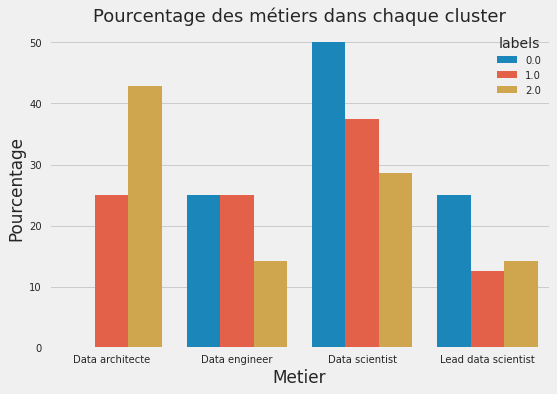

In [57]:
#Barplot des métiers par cluster
metier_counts = (labeleddata.groupby(['labels'])['Metier']
                     .value_counts(normalize=True)
                     .rename('Pourcentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Metier'))
sns.barplot(x="Metier", y="Pourcentage", hue="labels", data=metier_counts)
plt.title("Pourcentage des métiers dans chaque cluster", size=18)
plt.show()

* Le cluster 0 est  composé essentiellement de data engineers (99.23%)
* Le cluster 1 est composé de Data scientists (~ 76%) et Lead data scientists (~24 %)
* Le cluster 2 est composé principalement de Data architectes (~ 100 %)

In [58]:
# Création d'une nouvelle base pour le plot des outils par cluster 
# Ajout des labels à la base ou les outils sont encodés
get_tools=coded_data_all
get_tools['labels']=labeleddata['labels']
values_counts=get_tools[["Python","R",	"SQL",	"Java",	"Hadoop","labels"]]
# transformer la base de sorte que les colonnes deviennent en ligne avec un ordre basé sur les labes
melting=values_counts.melt(id_vars=["labels"])
#Conserver que les observations ou les outils ont été utilisé
only_used_tools=melting.loc[melting['value']==1]
only_used_tools.head()

,labels,variable,value
0,2.0,Python,1
1,1.0,Python,1
2,1.0,Python,1
3,0.0,Python,1
4,2.0,Python,1


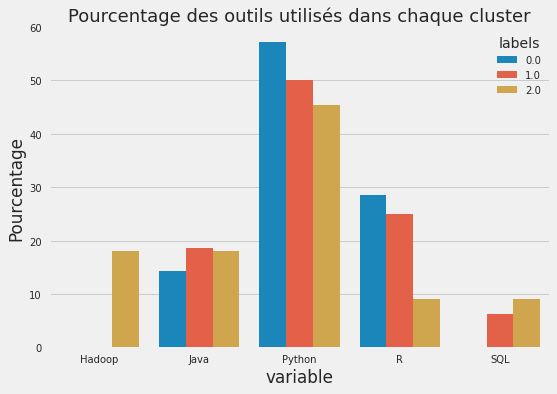

In [59]:
tool_counts = (only_used_tools.groupby(['labels'])['variable']
                     .value_counts(normalize=True)
                     .rename('Pourcentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('variable'))
sns.barplot(x="variable", y="Pourcentage", hue="labels", data=tool_counts)
plt.title("Pourcentage des outils utilisés dans chaque cluster", size=18)
plt.show()

* Le cluster 0 (Data engineers) est principalement caractérisé par les outils Python, Hadoop, Java.
* Le cluster 1 (Data scientists) contient majoritairement les outils Python, R et SQL.
* Le cluster 2 (Data architectes) est composé par les outils Python, Java, Hadoop
* Les clusters 0 et 2 sont comparables en terme d'outils, cela nous fait penser à la possibilité d'aggréger les profils data engineers et data architectes en un seul cluster.

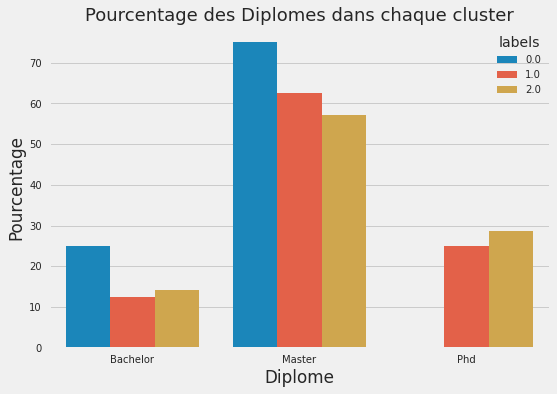

In [60]:
Diplome_percent = (labeleddata.groupby(['labels'])['Diplome']
                     .value_counts(normalize=True)
                     .rename('Pourcentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Diplome'))
sns.barplot(x="Diplome", y="Pourcentage", hue="labels", data=Diplome_percent)
plt.title("Pourcentage des Diplomes dans chaque cluster", size=18)
plt.show()

* Le cluster 0 est majoritairement occupé par le niveau master, les autres niveaux d'études sont comparables.
* Le cluster 1 est caractérisé par les diplomés en Master et Phd.
* Le cluster 2 est majoritairement occupé par le niveau master, les autres niveaux d'études sont comparables.

Encore une fois la ressemblance entre les clusters détectée au niveau de la variable Diplome nous fait penser un réunir les clusters 0 et 2.

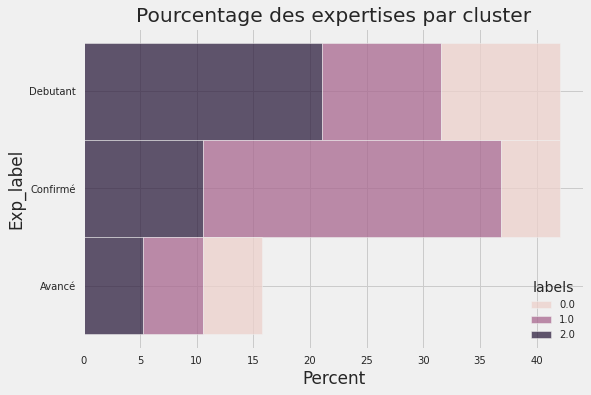

In [61]:
sns.histplot(binwidth=1,y="Exp_label", hue="labels", data=labeleddata, stat="percent", multiple="stack")
plt.title("Pourcentage des expertises par cluster")

plt.show()

* Les comportements des clusters 0 et 2 sont comparables en terme d'expertise aussi. Ce ci confirme l'hypothèse de la fusion de ces deux clusters.